In [1]:
users = [
    {"id":0,"name":"Hero"},
    {"id":1,"name":"Dunn"},
    {"id":2,"name":"Sue"},
    {"id":3,"name":"Chi"},
    {"id":4,"name":"Thor"},
    {"id":5,"name":"Clive"},
    {"id":6,"name":"Hicks"},
    {"id":7,"name":"Devin"},
    {"id":8,"name":"Kate"},
    {"id":9,"name":"Klein"},
    ]

In [2]:
friendship_pairs = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

In [3]:
friendships = {user['id']:[] for user in users}

for i,j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(1)

In [4]:
friendships

{0: [1, 2],
 1: [1, 2, 3],
 2: [1, 1, 3],
 3: [1, 1, 4],
 4: [1, 5],
 5: [1, 6, 7],
 6: [1, 8],
 7: [1, 8],
 8: [1, 1, 9],
 9: [1]}

Let's ask. Whats the average number of connections?
First, find the total number of connections -> summing up the lengths all the friends lists

In [5]:
def number_of_friends(user):
    #How many friends does a user have
    user_id = user['id']
    friend_ids = friendships[user_id]
    return len(friend_ids)

In [6]:
total_connections = sum((number_of_friends(user)) for user in users)
total_connections

24

In [7]:
average_numb_connections = total_connections/len(users)
average_numb_connections

2.4

Most connected people

In [8]:
num_friends_by_id = [(user['id'],number_of_friends(user)) for user in users]

num_friends_by_id.sort(
    key=lambda id_and_friends: id_and_friends[1],
    reverse=True
)

### Data scientists you may know
A person might know the friends of a friend

In [9]:
def persons_might_know(user):
    possible_friends = []
    user_id = user['id']
    friends = friendships[user_id]
    for friend in friends:
        friends_of_friend = friendships[friend]
        for this_friend in friends_of_friend:
            if(this_friend!=user_id) and (this_friend not in friends):
                possible_friends.append(this_friend)
    
    possible_friends = list(set(possible_friends))   
      
    return possible_friends


In [10]:
friends_of_friends = [{user['id']: persons_might_know(user)} for user in users]    
friends_of_friends

[{0: [3]},
 {1: [4]},
 {2: [4]},
 {3: [2, 5]},
 {4: [2, 3, 6, 7]},
 {5: [8, 2, 3]},
 {6: [9, 2, 3]},
 {7: [9, 2, 3]},
 {8: [2, 3]},
 {9: [2, 3]}]

In [75]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [12]:
from collections import defaultdict
user_ids_by_interest = defaultdict(list)
for user_id,interest in interests:
    user_ids_by_interest[interest].append(user_id)

interest_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interest_by_user_id[user_id].append(interest)


In [13]:
def most_common_interests_with_user(user):
    count=0
    max_user_interest = None
    count_max_user_interest = 0
    user_id = user['id']
    for interest in interest_by_user_id[user_id]:
        for user in user_ids_by_interest[interest]:
            if user != user_id:
                count = count + 1
                if count > count_max_user_interest:
                    max_user_interest = user
    return max_user_interest

In [14]:
max_user_interest = [{user['id']: most_common_interests_with_user(user)} for user in users]
max_user_interest

[{0: 1},
 {1: 0},
 {2: 7},
 {3: 6},
 {4: 3},
 {5: 9},
 {6: 3},
 {7: 8},
 {8: 9},
 {9: 8}]

### Sales and experience


In [15]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)]

In [21]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Years of experience')

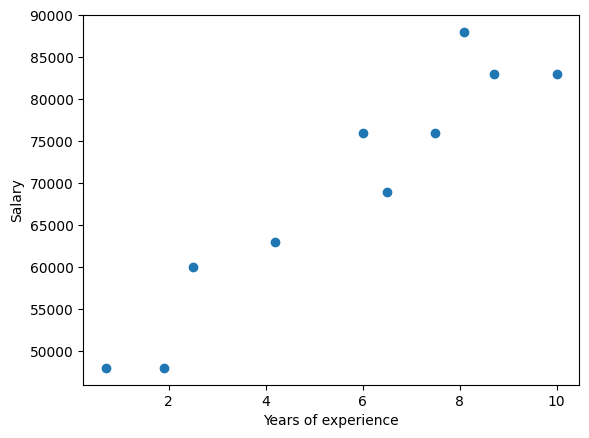

In [37]:
fig,ax = plt.subplots()
sal = [sal_ten[0] for sal_ten in salaries_and_tenures]
tenures = [sal_ten[1] for sal_ten in salaries_and_tenures]
ax.scatter(tenures,sal)
ax.set_ylabel("Salary")
ax.set_xlabel("Years of experience")

People with more experience tend to earn more

In [61]:
# Average salary for each tenure
salary_by_tenure = defaultdict(list)
for salary,tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
salary_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [59]:
average_salary_by_tenure={
    tenure: sum(salaries)/len(salaries) for tenure, salaries in salary_by_tenure.items()
}

In [60]:
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [62]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure <5:
        return "between two and five"
    else:
        return "more than five"


In [65]:
salary_by_tenure_bucket = defaultdict(list)

for salary,tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [66]:
salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [69]:
average_salaries = {bucket : sum(salary)/len(salary) for bucket,salary in salary_by_tenure_bucket.items()}

In [70]:
average_salaries

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

### Paid accounts
Which users pay for accounts and which don't
- 0.7 paid
- 1.9 unpaid
- 2.5 paid
- 4.2 unpaid
- 6.0 unpaid
- 6.5 unpaid
- 7.5 unpaid
- 8.1 unpaid
- 8.7 paid
- 10.0 paid

In [72]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"

### Topics of interest


In [78]:
interests

[(0, 'Hadoop'),
 (0, 'Big Data'),
 (0, 'HBase'),
 (0, 'Java'),
 (0, 'Spark'),
 (0, 'Storm'),
 (0, 'Cassandra'),
 (1, 'NoSQL'),
 (1, 'MongoDB'),
 (1, 'Cassandra'),
 (1, 'HBase'),
 (1, 'Postgres'),
 (2, 'Python'),
 (2, 'scikit-learn'),
 (2, 'scipy'),
 (2, 'numpy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'R'),
 (3, 'Python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'Python'),
 (5, 'R'),
 (5, 'Java'),
 (5, 'C++'),
 (5, 'Haskell'),
 (5, 'programming languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'scikit-learn'),
 (7, 'Mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'Big Data'),
 (8, 'artificial intelligence'),
 (9, 'Hadoop'),
 (9, 'Java'),
 (9, 'MapReduce'),
 (9, 'Big Data')]

In [79]:
interest_lower = [(user,interest.lower()) for user,interest in interests]
interest_lower

[(0, 'hadoop'),
 (0, 'big data'),
 (0, 'hbase'),
 (0, 'java'),
 (0, 'spark'),
 (0, 'storm'),
 (0, 'cassandra'),
 (1, 'nosql'),
 (1, 'mongodb'),
 (1, 'cassandra'),
 (1, 'hbase'),
 (1, 'postgres'),
 (2, 'python'),
 (2, 'scikit-learn'),
 (2, 'scipy'),
 (2, 'numpy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'r'),
 (3, 'python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'python'),
 (5, 'r'),
 (5, 'java'),
 (5, 'c++'),
 (5, 'haskell'),
 (5, 'programming languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'scikit-learn'),
 (7, 'mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'big data'),
 (8, 'artificial intelligence'),
 (9, 'hadoop'),
 (9, 'java'),
 (9, 'mapreduce'),
 (9, 'big data')]

In [81]:
from collections import Counter
words_and_counts = Counter(word for user,interest in interests for word in interest.lower().split())

In [82]:
words_and_counts

Counter({'big': 3,
         'data': 3,
         'java': 3,
         'python': 3,
         'learning': 3,
         'hadoop': 2,
         'hbase': 2,
         'cassandra': 2,
         'scikit-learn': 2,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'neural': 2,
         'networks': 2,
         'spark': 1,
         'storm': 1,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

In [85]:
for word,count in words_and_counts.most_common():
    if (count > 1):
        print(word,count)



big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [13]:
def apply_to_one(f):
    return f(1)

def sum(a,b=10):
    return a+b

x = apply_to_one(sum)

In [15]:
y = apply_to_one(lambda x:x+3)
y

4

In [26]:
lit = [4,43,6,4,2,3,2,4,56,6]
lit[2:9:2]

[6, 2, 2, 56]

In [32]:
from collections import Counter

c = Counter([0,3,4,3,0,0,0,0,0,])
c

Counter({0: 6, 3: 2, 4: 1})

In [38]:
c.most_common()

[(0, 6), (3, 2), (4, 1)]

In [40]:
item_list = [1,2,4,3,2,1,1]
item_set = set(item_list)
item_set

{1, 2, 3, 4}

In [52]:
x = [3,5,34,2,4,2,5,2]
y = sorted(x,reverse=True)
y


[34, 5, 5, 4, 3, 2, 2, 2]

### List comprehensions

In [56]:
square_list = [my_x **2 for my_x in x]
square_list

[9, 25, 1156, 4, 16, 4, 25, 4]

In [53]:
square_dict = {my_x : my_x **2 for my_x in x}
square_dict

{3: 9, 5: 25, 34: 1156, 2: 4, 4: 16}

In [59]:
# Multiple fors in list comprehensions
pairs = [(x,y)
         for x in range(10)
         for y in range(10)]
pairs

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 9)]

### Asserts
Will cause our code to raise an assertion error if our specified condition is not truthy

In [62]:
assert 9*3 == 27, "Debe dar 27"

### Classes

In [73]:
class CountingClicker:
    def __init__(self,count=0):
        self.count=count
    def clicked(self):
        self.count = self.count + 1    
    def read(self):
        return self.count
    def reset(self):
        self.count=0   

In [80]:
clicke1 = CountingClicker(10)
clicke1.clicked()
clicke1.clicked()
clicke1.clicked()


In [81]:
assert clicke1.read() == 13

In [82]:
clicke1.reset()
clicke1.clicked()
assert clicke1.read() == 1


### SubClasses


In [85]:
class NoResetClicker(CountingClicker):
    def reset(self):
        pass

In [88]:
noresclic = NoResetClicker(5)
assert noresclic.read() == 5

In [89]:
noresclic.reset()

In [90]:
assert noresclic.read() == 5

In [94]:
names = ["Bruno","Juan","Julieta","Agustin"]
for i,name in enumerate(names):
    print(f"name {i} is {name}")

name 0 is Bruno
name 1 is Juan
name 2 is Julieta
name 3 is Agustin


### Regular expressions

In [98]:
import re
re_examples = [
    not re.match("a","cat"), #re.match -> Checks whether the beginning of a string matches a regular expression
    re.search("a","cat"), # re.seacrh -> Checks whether any part of a string matches a regular expression
    not re.search("c","dog"),
    3 == len(re.split("[ab]","carbs")),
    "R-D-" == re.sub("[0-9]","-","R2D2")
]
assert all(re_examples)

### zip and Argument unpacking
zip function -> transforms multiple iterables into a single iterable of tuples of corresponding function


In [113]:
list1 = ["a","b","c","d"]
list2 = [1,2,3,4]
list3 = ["$","%","/",")"]

pairs =[pair for pair in zip(list1,list2,list3)]

In [119]:
letters,numbers,symbols = zip(*pairs)

In [120]:
letters

('a', 'b', 'c', 'd')

### args and kwargs
If we want to create a higher-order function that takes as input some function f and return a new function that for any input returns twice the value of f:

In [122]:
def doubler(f):
    # Here we define a new function that keeps a reference to f
    def g(x):
        return 2 * f(x)
    #And return that new function
    return g


In [125]:
def f1(x):
    return x+1

In [130]:
g = doubler(f1)
assert g(3) == 8

However this doesn't work with functions that take more than a single argument

In [133]:
def f2(x,y):
    return x+y
g= doubler(f2)
try:
    g(1,2)
except TypeError:
    print("As defined, g only takes one argument")



As defined, g only takes one argument


We need a way to specify a function that takes arbitrary arguments. We can do this with argument unpacking

In [136]:
def magic(*args,**kwargs):
    print("unnamed args:",args)
    print("keyword args:",kwargs)
magic(1,2,key="word",key2="word2")

unnamed args: (1, 2)
keyword args: {'key': 'word', 'key2': 'word2'}


This means: When we define a function like this, args is a tuple of its unnamed arguments and kwargs is a dict of its named arguments. It works the other way too, if you want to use a list (or tuple) and dict to supply arguments to a function

In [138]:
def other_way_magic(x,y,z):
    return x+y+z

x_y_list = [1,2]
z_dict = {"z":3}
other_way_magic(*x_y_list,**z_dict)

6

4